#HW9 Eligibility and Traces


##environment
The grid world size is 10*5 like following, red color and edge represent walls, every transition get reward = -1, if agent step into the swamps, get -100 reward.

parameters:

discounted rate = 1.0

learning rate for $\theta$ = 0.00001

learning rate for $v$ = 0.1

epsilon = 0.1

total_episode = 1000


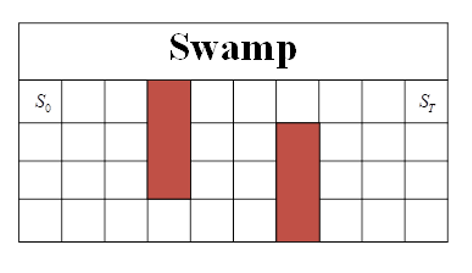

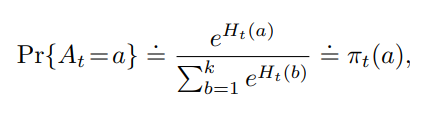

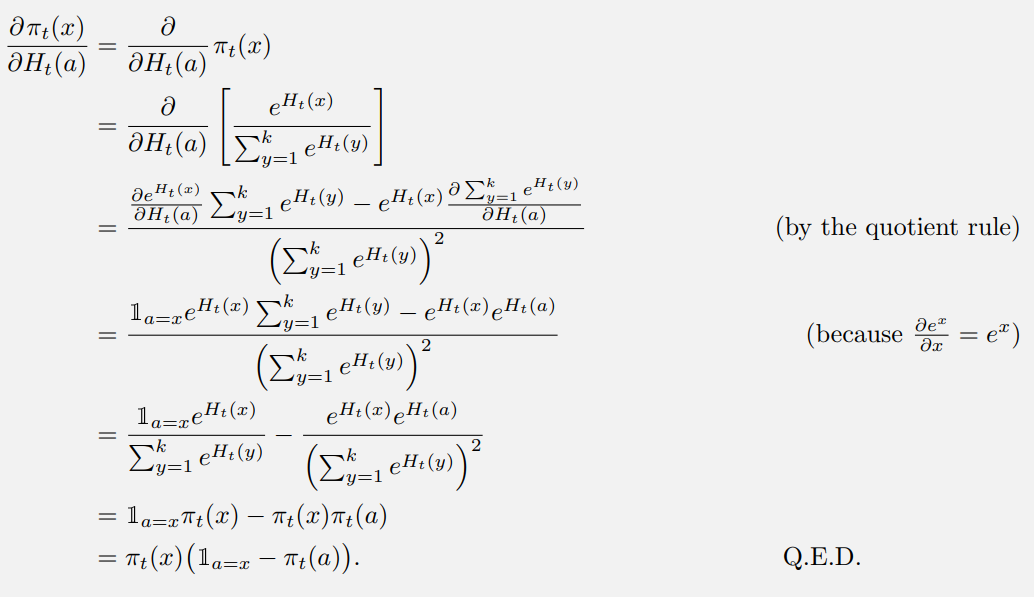

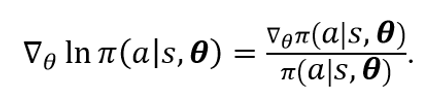

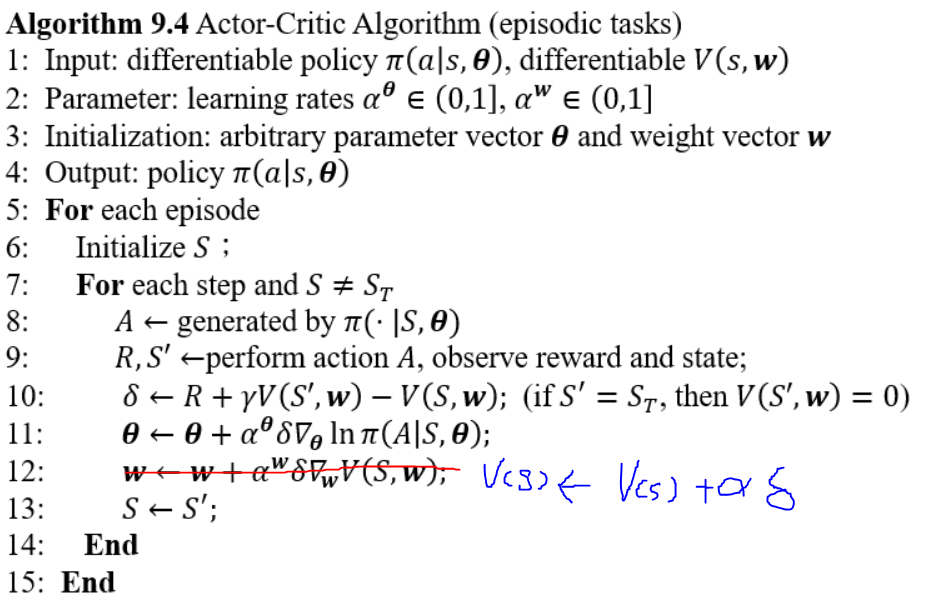

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import math

In [57]:
# Parameters
GAMMA = 1.0
ALPHA_theta = 0.001
ALPHA_v = 0.1
EPSILON = 0.1

WORLD_SIZE = [5,10]
S0 = [1,0]
ST = [1,9]
Max_episode = 1000
# left, up, right, down
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]] # left, up, right, down

In [58]:
# Environment
def step(state, action):
  SWAMP = [[0,i] for i in range(10)]
  WALL = [[1,3],[2,3],[3,3],[2,6],[3,6],[4,6]]
  state_n = list(np.array(state) + np.array(action))
  state_n = [np.clip(state_n[0],0,4),np.clip(state_n[1],0,9)]
  state_n = state if state_n in WALL else state_n
  reward = -1
  if state_n in SWAMP:
     reward = -100
  return [state_n, reward]

In [59]:
# For sarsa
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(4)

In [60]:
# For sarsa
def sarsa():
  qtable = rd.rand(5,10,4)
  qtable[1,9,:]=0
  returns = []
  for episode in range(1000):

    epsilon = EPSILON
    state = S0
    action = chooseAction(state, qtable, epsilon)
    G = 0
    while state != ST:
      
      state_n, reward = step(state, ACTIONS[action])
      action_n = chooseAction(state_n, qtable, epsilon)
      qtable[state[0],state[1],action] += ALPHA_v * (reward+GAMMA*qtable[state_n[0],state_n[1],action_n] - qtable[state[0],state[1],action])
      state = state_n
      action = action_n
      G += reward
    returns.append(G)
    
  return returns

In [61]:
# Actor critic
def chooseAction_pg(pi):
    return np.random.choice(4, p=pi)

In [62]:
# Actor critic
def gradient_ln(G, action, policy):
  #coed here#
  grad = np.ones(4)
  for i in range(4):
    if i == action: 
      grad[i] = 1 - policy[i]
    else:
      grad[i] = - policy[i]
  ##########
  return grad

In [63]:
# Actor critic
def AC():
    h_table = np.zeros([5, 10, 4])
    v_table = np.zeros([5, 10])
    pi = np.ones([5, 10, 4]) * 0.25

    returns = []
    for episode in range(1000):

    #coed here#
      state = S0
      G = 0
      while state != ST:
        action = chooseAction_pg(pi[state[0],state[1]])
        state_n, reward = step(state, ACTIONS[action])

        if state_n == ST:
          v_table[state_n[0],state_n[1]] = 0
          delta = reward-v_table[state[0],state[1]]
        else:
          delta = reward+GAMMA*v_table[state_n[0],state_n[1]]-v_table[state[0],state[1]]

        Gradient = gradient_ln(G, action, pi[state[0],state[1]])
        h_table[state[0],state[1]] += ALPHA_theta * delta * Gradient
        temp = 0
        for k in range(4):
          temp += math.exp(h_table[state[0],state[1],k])
        for a in range(4):
          pi[state[0],state[1],a] = math.exp(h_table[state[0],state[1],a])/temp
        
        v_table[state[0],state[1]] += ALPHA_v * delta
        
        state = state_n
        G += reward
      returns.append(G)
    ##########

    return returns

(-1000.0, 0.0)

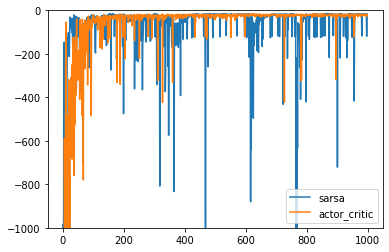

In [64]:
plt.plot(np.average([sarsa() for i in range(1 )],axis=0),label='sarsa')
plt.plot(np.average([AC() for i in range(1 )],axis=0),label='actor_critic')
plt.legend()
plt.ylim(-1000,0)



# result(80%)

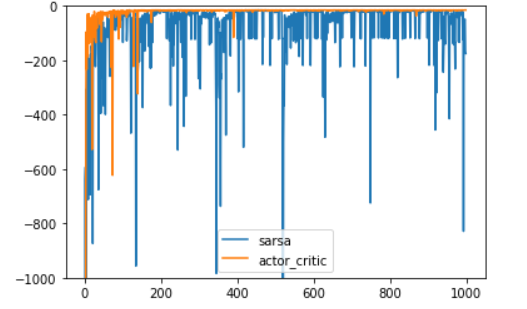

# experiment (20%)
please add baseline to actor critic


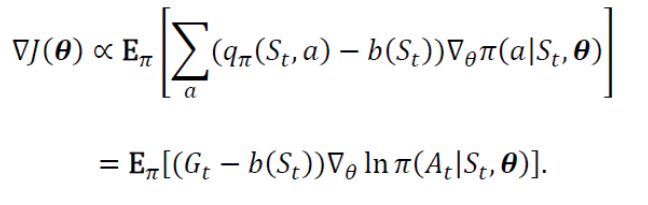

In [65]:
# Actor critic
def AC_b():
    h_table = np.zeros([5, 10, 4])
    v_table = np.zeros([5, 10])
    pi = np.ones([5, 10, 4]) * 0.25

    returns = []
    for episode in range(1000):

    #coed here#
  
    ##########

    return returns

IndentationError: ignored

In [ ]:
plt.plot(np.average([AC_b() for i in range(1 )],axis=0),label='actor_critic_b')
plt.plot(np.average([AC() for i in range(1 )],axis=0),label='actor_critic')
plt.legend()
plt.ylim(-1000,0)